#### Import libraries

In [14]:
import os
import sys
import pandas as pd
import yfinance as yf
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

#### Current working directory

In [15]:
#current working directory
current_dir=os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir=os.path.dirname(current_dir)
print(parent_dir)
sys.path.append(parent_dir)

c:\10acadamy\week1\financial-data-analysis\notebooks
c:\10acadamy\week1\financial-data-analysis


In [16]:
from scripts.financial_analyzer import FinancialAnalyzer,CommonAnalysis

In [17]:
# read one raw analyst rating and all historical data csv file to create a dataframe for each
df_raw_anlyst_rting=CommonAnalysis.read_csv_file('../dataset/raw_analyst_ratings.csv')

df_AAPL_historical=CommonAnalysis.read_csv_file('../dataset/yfinance_data/AAPL_historical_data.csv')
df_AMZN_historical=CommonAnalysis.read_csv_file('../dataset/yfinance_data/AMZN_historical_data.csv')
df_GOOG_historical=CommonAnalysis.read_csv_file('../dataset/yfinance_data/GOOG_historical_data.csv')
df_META_historical=CommonAnalysis.read_csv_file('../dataset/yfinance_data/META_historical_data.csv')
df_MSFT_historical=CommonAnalysis.read_csv_file('../dataset/yfinance_data/MSFT_historical_data.csv')
df_NVDA_historical=CommonAnalysis.read_csv_file('../dataset/yfinance_data/NVDA_historical_data.csv')
df_TSLA_historical=CommonAnalysis.read_csv_file('../dataset/yfinance_data/TSLA_historical_data.csv')

# show some data of the dataset
df_raw_anlyst_rting.head()
# df_AAPL_historical.head()
# df_AMZN_historical.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [18]:
# verify the column names and datatype
print('Raw analyst rating:\n',df_raw_anlyst_rting.dtypes, '\nApple historical stock market:\n',df_AAPL_historical.dtypes)

Raw analyst rating:
 headline     object
url          object
publisher    object
date         object
stock        object
dtype: object 
Apple historical stock market:
 Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


In [24]:
# convert the datatype some column to str
# Define the conversion dictionary
convert_dict = {'headline': str, 'url': str,'publisher':str,'stock':str}

# Convert columns using the dictionary
df_raw_anlyst_rting = df_raw_anlyst_rting.astype(convert_dict)

# Convert the 'date' column to datetime
df_raw_anlyst_rting['date'] = pd.to_datetime(df_raw_anlyst_rting['date'],errors='coerce',format='%Y-%m-%d %H:%M:%S')
df_AAPL_historical['Date'] = pd.to_datetime(df_AAPL_historical['Date'])
df_AMZN_historical['Date'] = pd.to_datetime(df_AMZN_historical['Date'])
df_GOOG_historical['Date'] = pd.to_datetime(df_GOOG_historical['Date'])
df_META_historical['Date'] = pd.to_datetime(df_META_historical['Date'])
df_MSFT_historical['Date'] = pd.to_datetime(df_MSFT_historical['Date'])
df_NVDA_historical['Date'] = pd.to_datetime(df_NVDA_historical['Date'])
df_TSLA_historical['Date'] = pd.to_datetime(df_TSLA_historical['Date'])
# print(df_TSLA_historical.dtypes)

# add a color column for each brand
df_AAPL_historical['Color']='r'
df_AMZN_historical['Color']='g'
df_GOOG_historical['Color']='b'
df_META_historical['Color']='r'
df_MSFT_historical['Color']='g'
df_NVDA_historical['Color']='b'
df_TSLA_historical['Color']='r'

df_AAPL_historical['Color']=df_AAPL_historical['Color'].astype(str)
# df_AMZN_historical['Color']='g'
# df_GOOG_historical['Color']='b'
# df_META_historical['Color']='r'
# df_MSFT_historical['Color']='g'
# df_NVDA_historical['Color']='b'
# df_TSLA_historical['Color']='r'
df_AAPL_historical.head()
df_AAPL_historical.dtypes


Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Dividends              float64
Stock Splits           float64
Color                   object
dtype: object

In [20]:
# data shape
df_raw_anlyst_rting.shape

(1407328, 5)

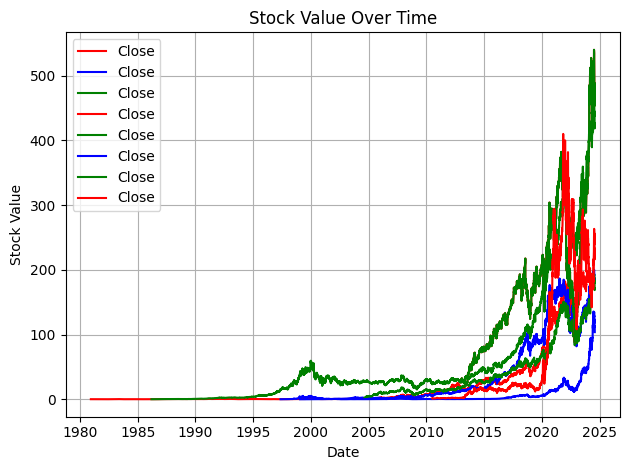

In [21]:
from scripts.financial_analyzer import PlotGraph
df_historical_data=[df_AAPL_historical,df_AMZN_historical,df_GOOG_historical,df_META_historical,
                           df_MSFT_historical,df_NVDA_historical,df_META_historical,df_TSLA_historical]
PlotGraph.plot_stock_data(df_historical_data,'Date','Close','Color','Stock Value Over Time')


#### Analyze the publication dates to see trends over time

C:\Users\mteshale\AppData\Local\Temp\ipykernel_18856\3046367922.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_count.index, y=day_of_week_count.values, palette="viridis")


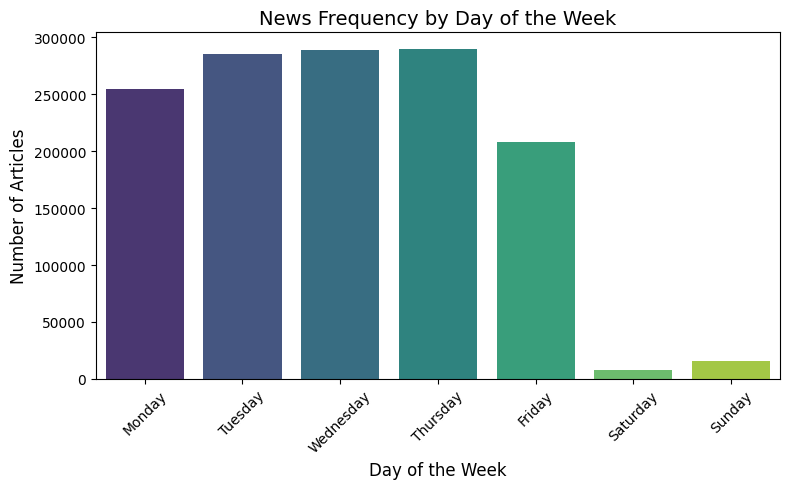

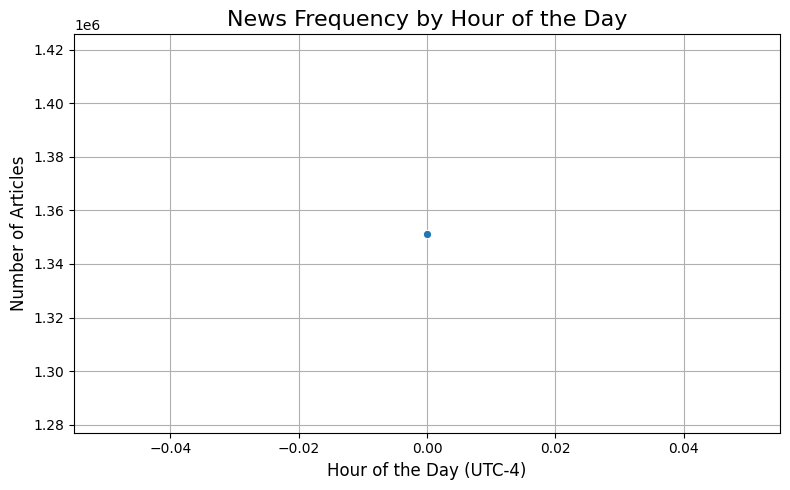

In [ ]:
# Analyze the publication dates to see trends over time, such as increased news 
    # frequency on particular days or during specific events

# Extract components from the date
df_raw_anlyst_rting['day_of_week'] = df_raw_anlyst_rting['date'].dt.day_name()  # Day of the week
df_raw_anlyst_rting['hour'] = df_raw_anlyst_rting['date'].dt.hour              # Hour of the day
df_raw_anlyst_rting['month'] = df_raw_anlyst_rting['date'].dt.month_name()     # Month name

# Analyze the frequency of articles by day of the week
day_of_week_count = df_raw_anlyst_rting['day_of_week'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Plot articles frequency by day of the week
plt.figure(figsize=(8, 5))
sns.barplot(x=day_of_week_count.index, y=day_of_week_count.values, palette="viridis")
plt.title("News Frequency by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Publisher Analysis

C:\Users\mteshale\AppData\Local\Temp\ipykernel_18856\1801131170.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='publisher', y='count', data=news_count, palette='Blues_d',legend=False)


Text(0, 0.5, 'News Count')

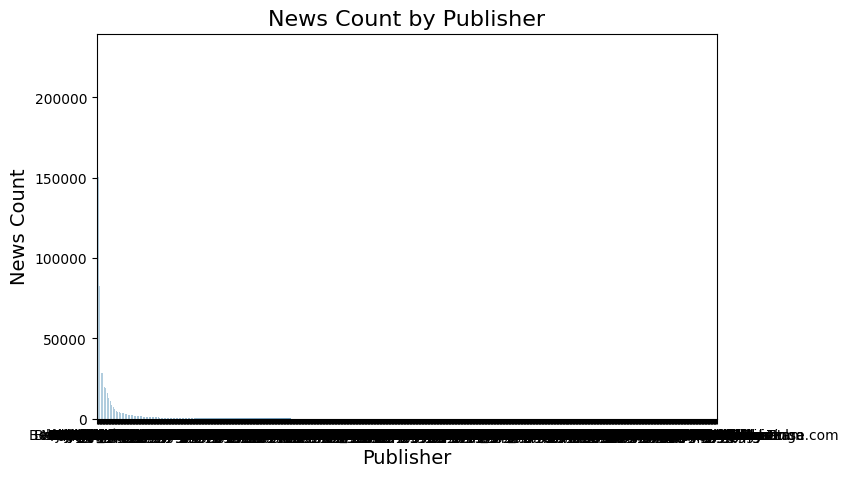

In [9]:
# news_grouped=df_raw_anlyst_rting.groupby('publisher')[['headline','url','date','stock']]
# len(news_grouped)
# news_grouped.head()
# Count the number of news articles by each publisher
news_count = df_raw_anlyst_rting['publisher'].value_counts().reset_index()
news_count.columns = ['publisher', 'count']
# Create the barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='publisher', y='count', data=news_count, palette='Blues_d',legend=False)

# Add title and labels
plt.title('News Count by Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('News Count', fontsize=14)

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns
# Extract useful date features
df_raw_anlyst_rting['year'] = df_raw_anlyst_rting['date'].dt.year
df_raw_anlyst_rting['month'] = df_raw_anlyst_rting['date'].dt.month
df_raw_anlyst_rting['day_of_week'] = df_raw_anlyst_rting['date'].dt.day_name()
df_raw_anlyst_rting['day'] = df_raw_anlyst_rting['date'].dt.date  # Useful for daily counts

# 1. Count publications by day
daily_counts = df_raw_anlyst_rting.groupby('day').size()

# Plot the daily trend
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title("Number of Publications Over Time")
plt.xlabel("Date")
plt.ylabel("Publication Count")
plt.show()

# 2. Analyze publication frequency by day of the week
day_of_week_counts = df_raw_anlyst_rting['day_of_week'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.title("Publication Frequency by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Publication Count")
plt.show()

# 3. Analyze publication trends by month and year
monthly_counts = df_raw_anlyst_rting.groupby(['year', 'month']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_counts, annot=False, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Publication Trends by Month and Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

# 4. Identify spikes in publication frequency
# Find days with the most publications
top_days = daily_counts.sort_values(ascending=False).head(5)
print("Top 5 Days with Highest Publication Frequency:")
print(top_days)

AttributeError: Can only use .dt accessor with datetimelike values